#### Student informations (Max. 2 students) should be written in this cell (Student ID, Student Name).

Student 1: 150200075 Matay Aydın   

Student 2: 150200096 Mustafa Kırcı

In [1]:
%load_ext autoreload
%autoreload 2

# HOMEWORK-3 Binary Linear Classification with Logistic Regression and Perceptron (Using Stochastic Gradient Descent)

In this homework, you will implement binary classification models such as Logistic Regression and Perceptron with appropriate cost functions, and train these models using Stochastic Gradient Descent algorithm.

Your homework includes 4 problems in total. Please read this notebook carefully to provide all required solutions to the problems. ( For your questions, e-mail to : ergunesr@itu.edu.tr )

We will start by reviewing Logistic Regression.

# 1. Logistic Regression with Mean Squared Error and Cross Entropy Cost For Binary Linear Classification

Binary classification is an instance of regression wherein the data still comes in the form of $P$ input/output pairs $\{(\mathbf{x}_p, y_p)\}^{P}_{p=1}$, and each input $\mathbf{x}_p$ is an $N$-dimensional vector. Now, the corresponding target $y_p$'s are no longer continuous but takes on only two discrete numbers. 

In the first problem set, you are expected to implement **two-class classification** by using Logistic Regression. Regressing a nonlinear step function to the data is called _Regression Perspective_ on classification. 

Denoting a linear model of $N$-dimensional input:

$\mathbf{\widetilde{x}}^T \mathbf{\widetilde{w}} = b + x_1 w_1 + x_2 w_2 + \cdots + x_N w_N$

where 

<div style="text-align:center">
$\mathbf{\widetilde{w}} = \begin{bmatrix}
b \\
w_1 \\
w_2 \\
\vdots \\
w_{N}
\end{bmatrix}$
and $\mathbf{\widetilde{x}} = \begin{bmatrix}
1 \\
x_1 \\
x_2 \\
\vdots \\
x_{N}
\end{bmatrix}$ . 
</div> 

The sigmoid function approximates the logistic regression by mapping input values to a probability between 0 and 1, enabling binary classification. The _Logistic Sigmoid Function_ is:
<div style="text-align:center">
$\displaystyle \sigma(x) = \frac{1}{1 + e^{-x}}$
</div> 
In Logistic Regression, the following approaximate equality holds:

<div style="text-align:center">
   $ \sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) \approx y_p, $ 

</div> 
where
$p=1,...,P.$

The corresponding Least Squares cost function is:

<div style="text-align:center">
$ g(\mathbf{\widetilde{w}}) = \frac {1} {P} \sum_{p=1}^{P} (\sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) - y_p)^2 $
</div> 

Fitting a logistic sigmoid to classification data by minimizing $ g(\mathbf{\widetilde{w}})$ is referred to as _logistic regression_.

Thus, the value of $\mathbf{\widetilde{w}}$ that minimizes $g(\mathbf{\widetilde{w}})$ is:

<div style="text-align:center">
$\mathbf{\widetilde{w}}^{*} = argmin_{\mathbf{\widetilde{w}}} g(\mathbf{\widetilde{w}}) $
</div> 

In this homework, you are assigned to find $\mathbf{\widetilde{w}}^{*}$ with **stochastic gradient descent**. Stochastic gradient descent uses the two equations below for the two versions of Logistic Regression you will implement. 

\begin{align*}
w_{i}^{t+1} &= w_{i}^{t} - \alpha \frac{\partial g(\mathbf{\widetilde{w}}^{t})}{\partial w_{i}^t} \text{ for all } i \\
b^{t+1} &= b^{t} - \alpha \frac{\partial g(\mathbf{\widetilde{w}}^t)}{\partial b^t}
\end{align*}



### Logistic Regression using the Cross Entropy cost 

The squared error cost works for every output value $y_p$. Because we know two-class classification setting is limited to the discrete values $ y_p \in \{0,1\}$, we can use more appropriate costs. 

_Log Error_ is defined as follows:
<div style="text-align:center">
$$
g(\mathbf{\widetilde{w}}) =
\begin{cases}
    -log(\sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) ) & \text{if } y_p = 1 \\
    -log(1 - \sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) ) & \text{if } y_p = 0
\end{cases}
$$
</div> 

This representation penalizes divergence from target values much more harshly than a squared error. The equivalent form of the log error in single line, formed by taking the average over all dataset is:



<div style="text-align:center">
$g(\mathbf{\widetilde{w}}) = \frac {1} {P} \sum_{p=1}^{P} y_p log(\sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) + (1-y_p)log(1 - \sigma(\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}})$
</div> 

This is, referred to as the _Cross Entropy cost_ for logistic regression.

The Cross Entropy cost function is utilized in logistic regression, offering advantages over the Least Squares method which is non-convex. Cross Entropy cost is always convex, ensuring more stable optimization. On the first problem, you are tasked with implementing Logistic Regression using both the squared error and cross entropy cost functions. 

## Vectorized Representation

The input to the model will be provided as a matrix with one sample in each column of $\mathbf{X}$:


<div style="text-align:center">
$ \mathbf{X} = \begin{bmatrix}
x_{1,1} & x_{1,2} & \ldots & x_{1,P} \\
x_{2,1} & x_{2,2} & \ldots & x_{2,P} \\
 \vdots & \vdots & \ddots & \vdots \\
x_{N,1} & x_{N,2} & \ldots & x_{N,P}
\end{bmatrix} $
</div>

The weight vector will be a row vector, containing:

<div style="text-align:center">
$ \mathbf{w} = [w_1, w_2, \cdots , w_N ]$
</div>

And bias term will be a scalar. 

## Normalization

Similar to Homework-2, you need to implement **MinMaxScaler** in **data_utils.py** in  **LogisticRegression.py**. (Normalization scales the features of a dataset to a consistent range, preventing dominance by features with larger scales.)

## Evaluation Metrics - Accuracy, Precision, Recall, and F1 

In this homework you are expected to report your models' results with commonly used classification metrics: accuracy, precision, recall, and F1.

Accuracy measures the proportion of correctly identified instances among the total instances. It's calculated as the ratio of the number of correct predictions to the total number of predictions made.
   - Formula: 
     ```
     Accuracy = (Number of Correct Predictions) / (Total Number of Predictions)
     ```

Recall, also known as sensitivity or true positive rate, measures the proportion of actual positive instances that were correctly identified by the model.
   - It answers the question: "Of all the positive instances, how many did we correctly identify?"
   - Formula: 
     ```
     Recall = True Positives / (True Positives + False Negatives)
     ```

Precision measures the proportion of true positive predictions among all positive predictions made by the model.
   - It answers the question: "Of all the instances predicted as positive, how many are actually positive?"
   - Formula: 
     ```
     Precision = True Positives / (True Positives + False Positives)
     ```

F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall.
   - It's particularly useful when the dataset is imbalanced.
   - Formula:
     ```
     F1 = 2 * (Precision * Recall) / (Precision + Recall)
     ```


You are expected to complete the following tasks:

1) Implement feature normalization class **MinMaxScaler** as instructed,

2) Implement and train Logistic Regression models with Mean Squared Error and Cross Entropy Cost by using stochastic gradient descent. Plot and report the training and test accuracies, precision, recall, and F1 scores of both methods and compare the results. Write your comments in a cell.

To provide your solution for Logistic regression, you need to complete the **LogisticRegression** class inside **LogisticRegression.py**  by implementing methods for initialization, sigmoid function computation, hypothesis calculation, training for binary classification with mean squared error (by stochastic gradient descent), training with cross-entropy loss (by stochastic gradient descent). The methods should handle initialization of instance variables, computation of sigmoid function, calculation of hypothesis values, iterative stochastic gradient descent updates for both mean squared error and cross-entropy loss. Please write your solutions to the designated spaces in **LogisticRegression.py** as instructed.

We start by calling **generate_data()** function. **This dataset will consist 20% of the dataset as the test set.** You do not need to change anything related to the data.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from data_utils import generate_data, MinMaxScaler

x_train, x_test, y_train, y_test = generate_data()


We can visualize our dataset as follows.

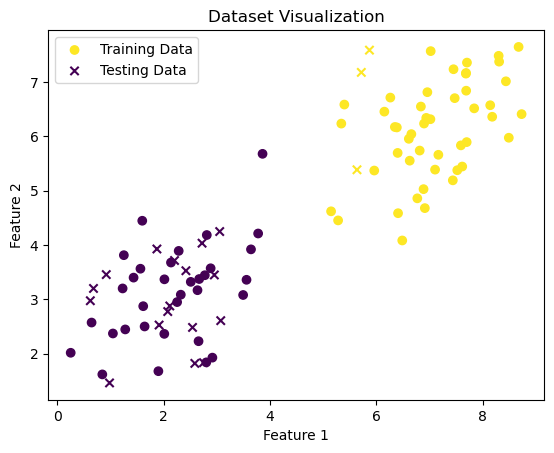

In [3]:
from matplotlib import pyplot as plt

# Visualize training data
plt.scatter(x_train[0], x_train[1], c=y_train, cmap='viridis', label='Training Data')
# Visualize testing data
plt.scatter(x_test[0], x_test[1], c=y_test, cmap='viridis', marker='x', label='Testing Data')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.legend()
plt.show()

The **transform** and **inverse_transform** methods are part of the **MinMaxScaler** class, which is commonly used for feature scaling and normalization. Feature scaling is important in data preprocessing to ensure that features with larger values do not dominate the model training process. The transform method scales the input data to a desired range, while the **inverse_transform** method can be used to reverse this scaling operation. By implementing these methods in the data_utils.py file, we can ensure that the input data is properly scaled and balanced, which can improve the performance of the classifiers.

In [4]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to x_train
scaler.fit(x_train)

# Transform x_train and x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

**LogisticRegression()** class takes datasets as inputs and returns a Logistic Regression model object. This class has two training methods. **train_binary_classification()** method is for training the model with minimizing the mean squared error while **train_binary_classification_cross_entropy()** trains the model by minimizing cross entropy loss. These methods find optimal Logistic Regression model parameters $\mathbf{\widetilde{w}}^{*}$ by using Stochastic Gradient Descent algortihm. Please code up necessary operations inside  **LogisticRegression** module and run the following cells. 

#### First, we will start by training Logistic Regression with MSE.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from LogisticRegression import LogisticRegression

# Create a model instance
model_mse = LogisticRegression(x_train_scaled, y_train, x_test_scaled, y_test)
# Start training my calling the MSE training method.
train_acc_mse, test_acc_mse = model_mse.train_binary_classification(iterations=1000)

#### Then you may start training with Cross Entropy cost. 

In [6]:
model_ce = LogisticRegression(x_train_scaled, y_train, x_test_scaled, y_test)
train_acc_ce, test_acc_ce = model_ce.train_binary_classification_cross_entropy(iterations=1000)

In [7]:
def plotMetrics(metrics, x_label, y_label, title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.ylim([0,101])
 
    colors = ['red', 'blue', 'green', 'purple']
    accuracy, precision, recall, f1 = np.transpose(metrics)

    # Plotting the elements with corresponding colors
    plt.plot(accuracy, color=colors[0], label='Accuracy')
    plt.plot(precision, color=colors[1], label='Precision')
    plt.plot(recall, color=colors[2], label='Recall')
    plt.plot(f1, color=colors[3], label='F1 Score')

    # Updating the legend
    legend_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
    plt.legend(legend_labels, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

def plotParamSearch(param_name, param_list, model, init, method, args, legend = None):
    plt.xlabel('Iterations')
    plt.ylabel('Percentage')
    plt.title(f'Best {param_name} search')
    plt.ylim([0, 101])
    max_acc = 0
    for param in param_list:
        for k, v in init.items():
            if v is None:
                init[k] = param
        for k, v in args.items():
            if v is None:
                args[k] = param
        m = model(**init)
        func = getattr(m, method)
        test_metrics = func(**args)
        if isinstance(test_metrics, list):
            test_acc = np.array(test_metrics, dtype=object)[:, 0]
        elif isinstance(test_metrics, tuple):
            test_acc = np.array(test_metrics[0], dtype=object)[:, 0]
        if test_acc[-1] > max_acc:
            max_acc = test_acc[-1]
            best_param = param
        if legend is None:
            plt.plot(test_acc, label=param)
        else: 
            plt.plot(test_acc)
    if legend is None:
        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    else:
        plt.legend(legend, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    print(f"Best {param_name}:\n", best_param)
    return best_param

def reportMetrics(metrics, isTrain=True):
    metrics = np.array(metrics, dtype=object)
    data = [
        ["Accuracy", "Precision", "Recall", "F1-Score"],
        metrics[-1, :],
        metrics[-1, :]
    ]
    data = np.array(data, dtype=object)
    data = data.T
    # Print table header
    if isTrain:
        print("The table of the final training metrics:")
    else:
        print("The table of the final test metrics:")
    print("| {:<10} | {:<20} | {:<20} |".format("Metric", "Train", "Test"))
    print("+{:-<12}+{:-<22}+{:-<22}+".format("", "", ""))
    # Print data rows
    for row in data:
        print("| {:<10} | {:<20} | {:<20} |".format(*row))

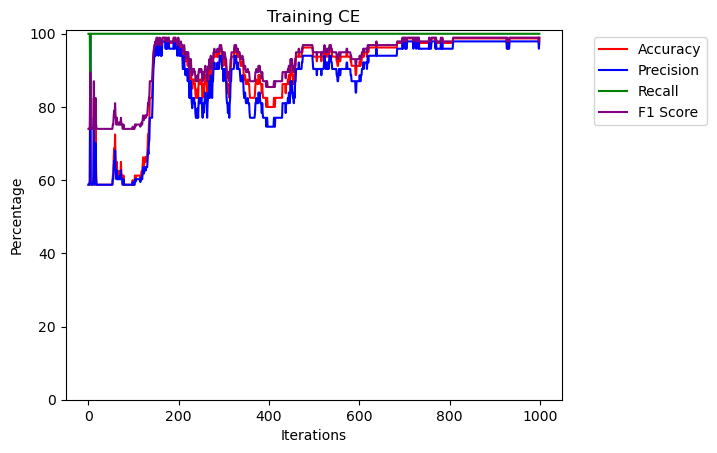

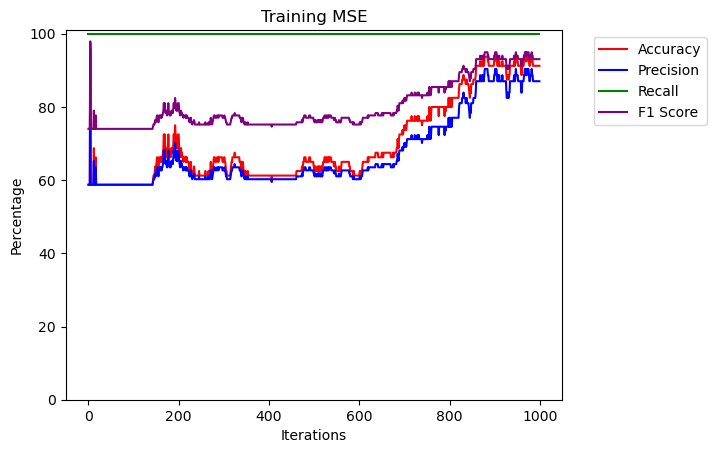

In [8]:
#Plot the model training accuracies
plotMetrics(train_acc_ce, 'Iterations', 'Percentage', 'Training CE')

plotMetrics(train_acc_mse, 'Iterations', 'Percentage', 'Training MSE')

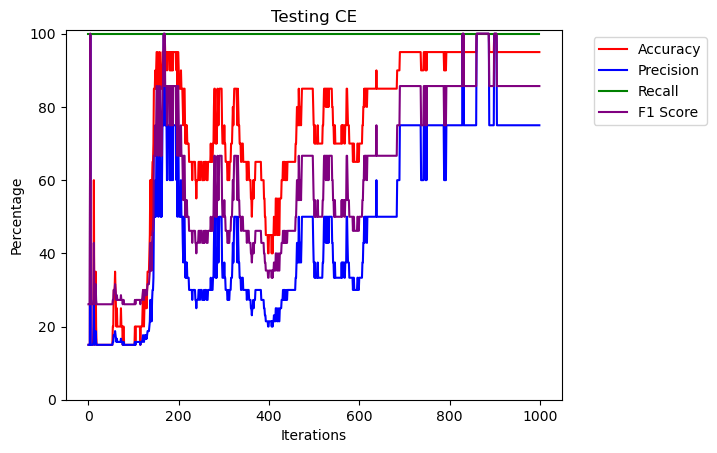

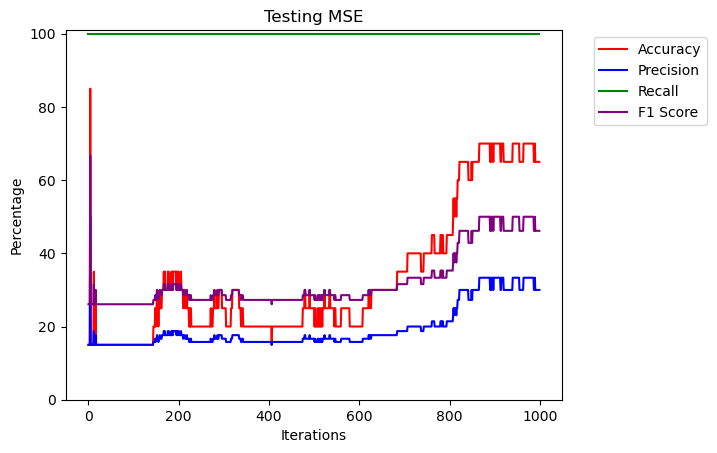

In [9]:

plotMetrics(test_acc_ce, 'Iterations', 'Percentage', 'Testing CE')

plotMetrics(test_acc_mse, 'Iterations', 'Percentage', 'Testing MSE')



# 1.2 Logistic Regression with Cross Entropy Cost (Minimization with  Stochastic Gradient Descent)

### In this problem you are expected to implement SGD algorithm with Cross Entropy Cost and build a binary classification pipeline:

- Implement **Stochastic Gradient Descent** algorithm for Cross Entropy Cost
- Construct a Binary Linear Classification model with Logistic Regression and Cross Entropy Cost
- Optimize the model parameters with Stochastic Gradient Descent. Implement hyperparameter search for learning rate and weight initialization. Report your search results. Plot Training and Testing accuracies Gradient Descent and SGD minimizations. Report and compare the performance of the models in terms of accuracy, precision, recall, and F1-scores.

You have been provided with a dataset **(HW2_Q1_2.npy)** consisting of three dimensions as features and corresponding labels. **This dataset will consist 20% of the dataset as the test set.** You may load the dataset by running the following cell.

In [10]:
import numpy as np

with open('HW2_Q1_2.npy', 'rb') as f:
    x_train = np.load(f)
    x_test = np.load(f)
    y_train = np.load(f)
    y_test = np.load(f)

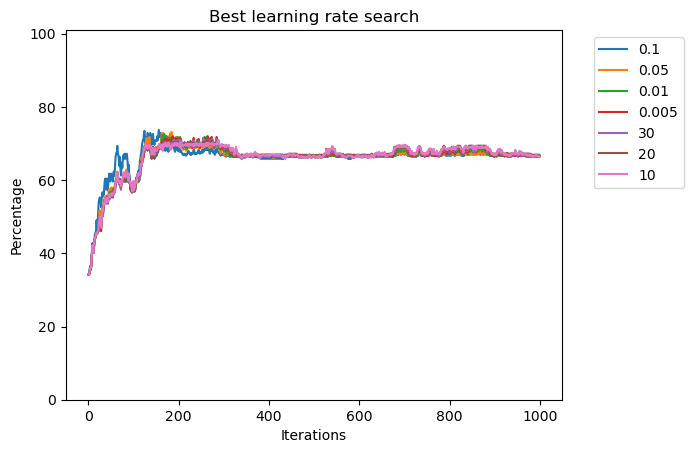

Best learning rate:
 0.01


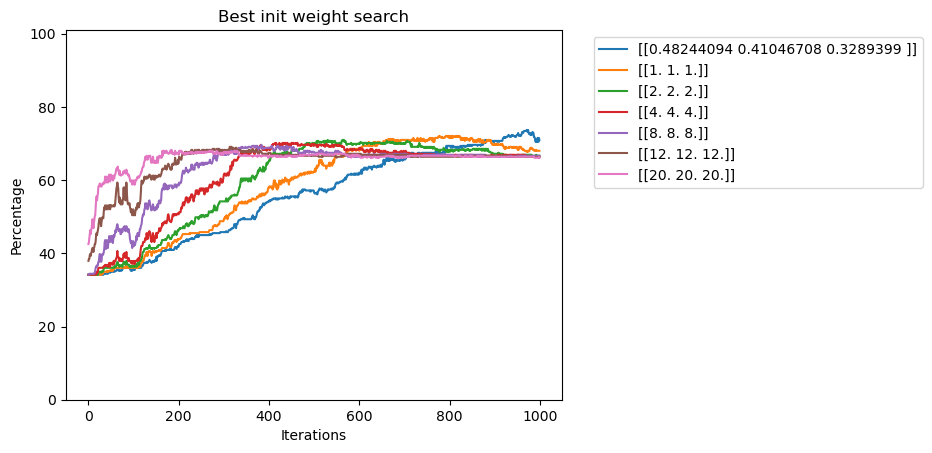

Best init weight:
 [[ 0.50330035  0.10574731 -0.1474386 ]]


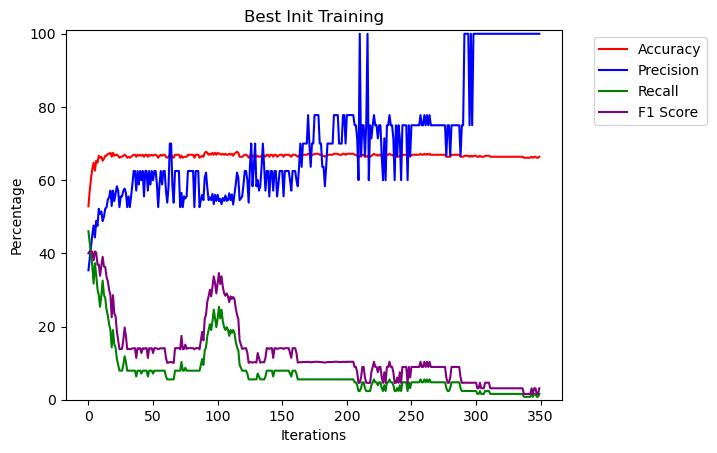

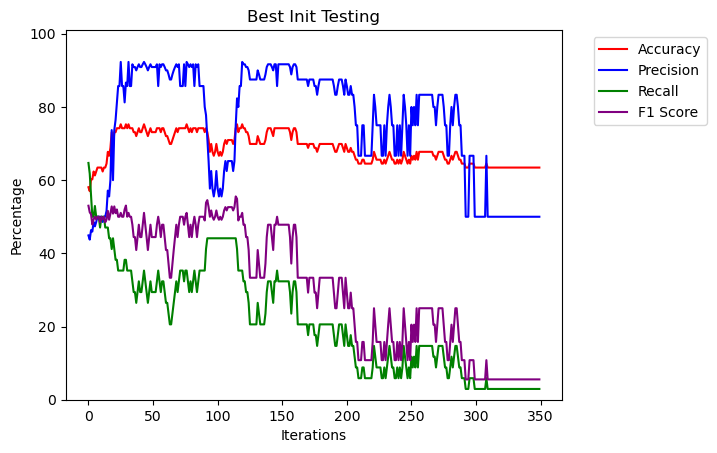

The table of the final training metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 66.39566395663957    | 66.39566395663957    |
| Precision  | 100.0                | 100.0                |
| Recall     | 1.5873015873015872   | 1.5873015873015872   |
| F1-Score   | 3.1250000000000004   | 3.1250000000000004   |
The table of the final test metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 63.44086021505376    | 63.44086021505376    |
| Precision  | 50.0                 | 50.0                 |
| Recall     | 2.941176470588235    | 2.941176470588235    |
| F1-Score   | 5.555555555555555    | 5.555555555555555    |


In [11]:
##############################################################################
# TODO: Implement Stochastic Gradient Descent (SGD) algorithm in             #
# LogisticRegression module. (For cross entropy cost)                        #
# Perform data scaling with MinMaxScaler                                     #
# Train the Logistic Regression model with both Gradient Descent (with Cross #
# Entropy Cost) and SGD                                                      #
# Plot and report the training and test accuracies, precision, recall,       #
# and F-1s.                                                                  #
##############################################################################

from LogisticRegression import LogisticRegression
from data_utils import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Fit the scaler to x_train
scaler.fit(x_train)


# Transform x_train and x_test
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


num_features = x_train.shape[0]
best_lr = 0.01
best_w = 0.5*np.ones((1, num_features))
max_iter = 1000
learning_rates = [1e-1, 5e-2, 1e-2, 5e-3, 30, 20, 10]
# initial weights to be used
weights = np.zeros((7, 1, num_features))
weights[0,:,:] = 0.5*np.ones((1, num_features))
weights[1,:,:] = np.ones((1, num_features))
weights[2,:,:] = 2*np.ones((1, num_features))
weights[3,:,:] = 4*np.ones((1, num_features))
weights[4,:,:] = 8*np.ones((1, num_features))
weights[5,:,:] = 12*np.ones((1, num_features))
weights[6,:,:] = 20*np.ones((1, num_features))

best_lr = plotParamSearch("learning rate", learning_rates, LogisticRegression, 
                { 
                    "x_train": x_train_scaled, 
                    "y_train": y_train, 
                    "x_test": x_test_scaled, 
                    "y_test": y_test, 
                    "lr": None, 
                    "init_weights": best_w
                }, 
                "train_binary_classification", 
                {
                    "iterations": max_iter
                })
best_w = plotParamSearch("init weight", weights, LogisticRegression, 
                { 
                    "x_train": x_train_scaled, 
                    "y_train": y_train, 
                    "x_test": x_test_scaled, 
                    "y_test": y_test, 
                    "lr": best_lr, 
                    "init_weights": None
                }, 
                "train_binary_classification", 
                {
                    "iterations": max_iter
                })

best_model_ce = LogisticRegression(x_train_scaled, y_train, x_test_scaled, y_test, lr = best_lr, init_weights = best_w) # best initialization
best_train_acc_CE, best_test_acc_CE = best_model_ce.train_binary_classification_cross_entropy(iterations = 350)

plotMetrics(best_train_acc_CE, 'Iterations', 'Percentage', 'Best Init Training')
plotMetrics(best_test_acc_CE, 'Iterations', 'Percentage', 'Best Init Testing')

reportMetrics(best_train_acc_CE)
reportMetrics(best_test_acc_CE, False)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 2. PERCEPTRON 

In Problem set 1, classification was treated as a particular form of non-linear regression resulted learning a linear decision boundary:


<div style="text-align:center">
$\mathbf{\widetilde{x}}^T \mathbf{\widetilde{w}} = 0 .$
</div> 

The Perceptron described here aims at determining this ideal linear decision boundary directly. It has a different approach than non-linear regression, the primary goal of perceptron is to separate different classes. The linear decision boundary cuts the input space into two half-spaces and our desired solution defines a hyperplane where we have:

<div align="center">
    <span>$\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}} > 0$ if $y_p = +1$</span> <br>
    <span>$\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}} < 0$ if $y_p = -1$</span>
</div>

For this decision boundary, the cost function for the entire dataset can be written as:
<div align="center">
$g_p(\mathbf{\widetilde{x}}) = \frac{1}{P} \sum_{p=1}^P max(0, -y_p\mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}) $
</div>

This cost function goes names such as _Perceptron cost, rectified linear unit, ReLU cost, and the hinge cost_. This function is always _convex_ except a single discontinuous derivative. Therefore, a common approach is to approximate the Perceptron cost with _Softmax_ function.

_Softmax_ function is defined as:
<div align="center">
$soft(s_0, s_1, \cdots, s_{C-1}) = log(e^{s_0} + e^{s_1} + \cdots + e^{s_{C-1}})$
</div>

Softmax function is a smooth approximarion to the $max$ function. Replacing the $max$ function gives the overall cost function as:
<div align="center">
$g_p(\mathbf{\widetilde{x}}) = \frac{1}{P} \sum_{p=1}^P log(1+e^{-y_p \mathbf{\widetilde{x}}^T_p \mathbf{\widetilde{w}}})$
    </div>

This cost alleviates the difficulties of the Perceptron cost. This cost can be minimized by local optimization techniques.

## 2.1 Binary MNIST classification by Perceptron with Softmax Approximation

In this problem , you will implement a binary classification on 2 digits of `MNIST` dataset by training a Perceptron model. Your Perceptron model will compute loss with Softmax approximation. You are assigned to find optimal parameters $\mathbf{\widetilde{w}}^{*}$ that minimizes the previously introduced cost function by using iterative optimization scheme **Stochastic Gradient Descent**. To achieve that, please complete **fit sgd()** methods of **SoftmaxPerceptron** class under **SoftmaxPerceptron.py** module as instructed. You are expected to implement hyperparameter search by changing the default values and plot accuracy curves for your search, and for the best results. 

We may start by loading the data:

In [12]:
import torch
from torchvision import datasets, transforms
# Load the MNIST training and test datasets
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

`MNIST` dataset has **60000 training and 10000 test images**. Let's see the dimensions of data.

In [13]:
print("Train dataset size:", train_dataset.data.shape)
print("Test dataset size:", test_dataset.data.shape)

Train dataset size: torch.Size([60000, 28, 28])
Test dataset size: torch.Size([10000, 28, 28])


Each sample is a 28x28 image. Let's visualize one example and see what they look like. 

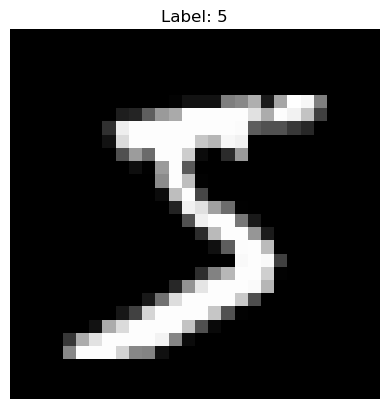

In [14]:
import matplotlib.pyplot as plt

# Define function to visualize a digit
def visualize_digit(image, label):
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')
    plt.show()

# Visualize a digit from the training dataset
index = 0  # Choose the index of the digit to visualize
digit_image = train_dataset.data[index]
visualize_digit(digit_image, 5)

To train a binary classification Perceptron model on `MNIST`, we will create our custom subset, which contains only digits 0 and 1. And then, we will flatten the images into vectors. Please run the following cell, you do not need to change anything.

In [15]:
# Filter train and test data for classes 0 and 1
train_indices = torch.logical_or(train_dataset.targets == 0, train_dataset.targets == 1)
test_indices = torch.logical_or(test_dataset.targets == 0, test_dataset.targets == 1)

train_data_filtered = train_dataset.data[train_indices]
train_labels_filtered = train_dataset.targets[train_indices]
test_data_filtered = test_dataset.data[test_indices]
test_labels_filtered = test_dataset.targets[test_indices]

# Relabel classes 0 and 1 as 1 and -1 respectively
train_labels_filtered[train_labels_filtered == 1] = -1
train_labels_filtered[train_labels_filtered == 0] = 1
test_labels_filtered[test_labels_filtered == 1] = -1
test_labels_filtered[test_labels_filtered == 0] = 1

# Flatten the images and convert them to numpy arrays
train_data_flat = train_data_filtered.reshape(train_data_filtered.shape[0], -1).T.numpy()
test_data_flat = test_data_filtered.reshape(test_data_filtered.shape[0], -1).T.numpy()
train_labels_filtered = train_labels_filtered.numpy()
test_labels_filtered = test_labels_filtered.numpy()


We start constructing our classification pipeline by scaling our data.

In [16]:
from data_utils import MinMaxScaler
import numpy as np 
np.random.seed(42)

scaler = MinMaxScaler()
fitted = scaler.fit(train_data_flat)
x_train_norm = scaler.transform(train_data_flat)
x_test_norm = scaler.transform(test_data_flat)

c:\Users\matay\apps\repos\LFD24\Binary Linear Classification with Logistic Regression and Perceptron (With SGD)\data_utils.py:70: RuntimeWarning: invalid value encountered in divide
  x_scaled = (x - np.min(x, axis=1, keepdims=True)) / (np.max(x, axis=1, keepdims=True) - np.min(x, axis=1, keepdims=True)) * (self.max_limit - self.min_limit) + self.min_limit


Now, we have train_data_flat as training set, and test_data_flat as test set. Let's check the sizes of the dataset. 

In [17]:
print("train set size:", train_data_flat.shape)
print("test set size:", test_data_flat.shape)

train set size: (784, 12665)
test set size: (784, 2115)


Now, you need to normalize the flattened data arrays

In [18]:
from data_utils import MinMaxScaler
import numpy as np 
np.random.seed(42)

scaler = MinMaxScaler(min_limit=0, max_limit=1)
fitted = scaler.fit(train_data_flat)
x_train_norm = scaler.transform(train_data_flat)
x_test_norm = scaler.transform(test_data_flat)

#### Now we can construct our model by calling SoftmaxPerceptron and start training. Fit_sgd() method trains the Perceptron with Stochastic Gradient Descent algorithm. You need the complete the methods in SoftmaxPerceptron module as instructed. Implement hyperparameter search to observe the change in accuracy, and plot each curve. Plot the training and test accuracies, precisions, recalls, and F-1 scores. 

This take can take long time. (About 1-2 mins...)


c:\Users\matay\apps\repos\LFD24\Binary Linear Classification with Logistic Regression and Perceptron (With SGD)\SoftmaxPerceptron.py:123: RuntimeWarning: overflow encountered in exp
  sigmoid = -sample_y * (1 - (1 / (1 + np.exp(-sample_y * xt_w))))


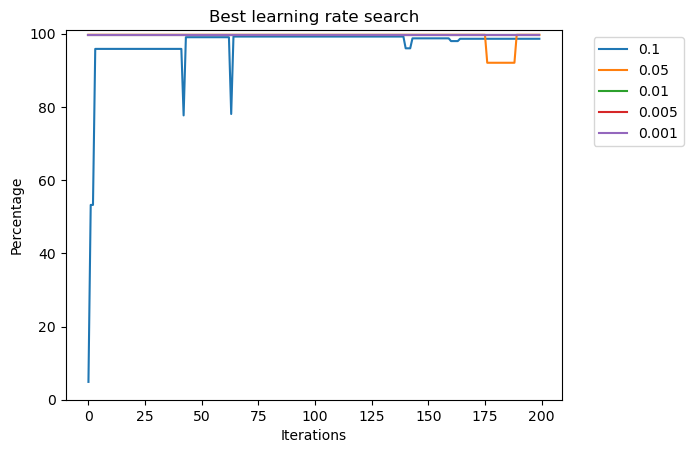

Best learning rate:
 0.05


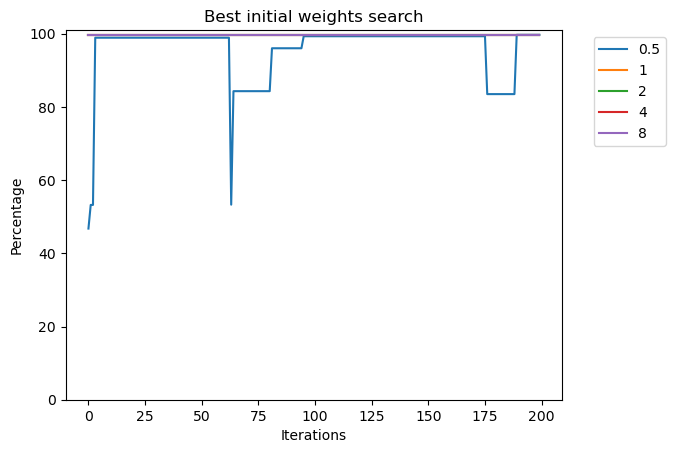

Best initial weights:
 [[  0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5    0.5
    0.5    0.5    0.5    0.5   -5.85  -2.75   3.05  19.75  16.2    1.8
    0.9    5.15  -8.55 -11.35   0.5    0.5    0.5    0

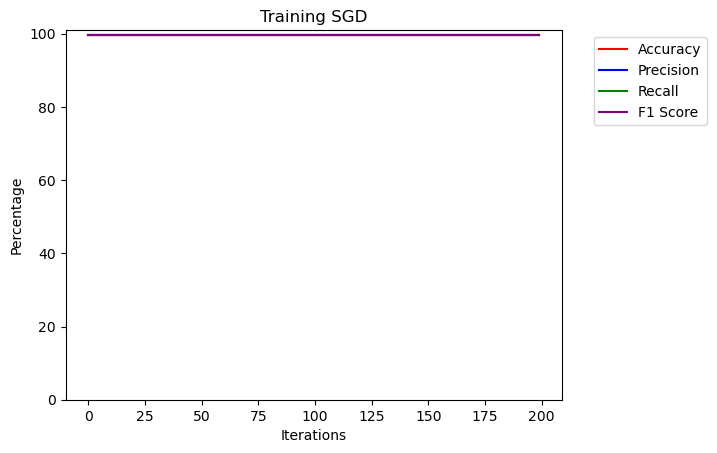

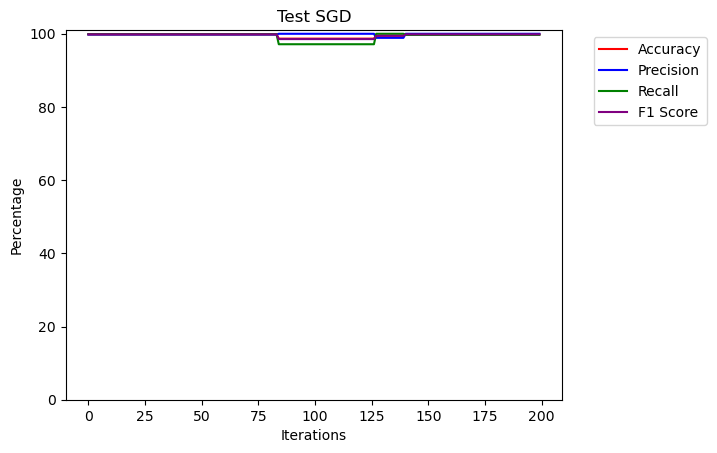

The table of the final training metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 99.71575207264114    | 99.71575207264114    |
| Precision  | 99.71288633676744    | 99.71288633676744    |
| Recall     | 99.67921661320277    | 99.67921661320277    |
| F1-Score   | 99.69604863221885    | 99.69604863221885    |
The table of the final test metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 99.8581560283688     | 99.8581560283688     |
| Precision  | 100.0                | 100.0                |
| Recall     | 99.6938775510204     | 99.6938775510204     |
| F1-Score   | 99.84670413898824    | 99.84670413898824    |


In [19]:
##############################################################################
# TODO: -Complete SoftmaxPerceptron.py module as instructed.                 #
# -Construct a Perceptron model for binary classification where targets      #
# are -1 or +1.                                                              #
# -Train your model with fit_gd() method which implements gradient descent   #
# algorithm for obtaining optimal model parameters. Implement hyperparameter #
# search for learning rate and weight initialization.                        #
# -Report performance in terms of accuracy.                                  #
# Plot the training and test accuracy, recall, precision, and F-1 scores.    #
##############################################################################

import numpy as np
import matplotlib.pyplot as plt
from SoftmaxPerceptron import SoftmaxPerceptron

best_lr = 0.15
best_w = np.random.randn(1, x_train_norm.shape[0] + 1) * 0.02
max_iter = 200
learning_rates = [1e-1, 5e-2, 1e-2, 5e-3, 1e-3]
# initial weights to be used
coeffs = [0.5, 1, 2, 4, 8]
weights = np.zeros((len(coeffs), 1, x_train_norm.shape[0] + 1))
for i, coeff in enumerate(coeffs):
    weights[i,:,:] = coeff * np.ones((1, x_train_norm.shape[0] + 1))

print("This take can take long time. (About 1-2 mins...)")

best_lr = plotParamSearch("learning rate", learning_rates, SoftmaxPerceptron,
                {
                    "weights": best_w, 
                    "learning_rate": None, 
                    "max_iter": max_iter
                },
                "fit_sgd",
                {
                    "X": train_data_flat,
                    "y": train_labels_filtered,
                })
best_w = plotParamSearch("initial weights", weights, SoftmaxPerceptron,
                {
                    "weights": None, 
                    "learning_rate": best_lr, 
                    "max_iter": max_iter
                },
                "fit_sgd",
                {
                    "X": train_data_flat,
                    "y": train_labels_filtered,
                },
                coeffs)

model_smax = SoftmaxPerceptron(best_w, best_lr, max_iter)
train_metrics = model_smax.fit_sgd(train_data_flat, train_labels_filtered)
plotMetrics(train_metrics, 'Iterations', 'Percentage', 'Training SGD')

model_smax = SoftmaxPerceptron(best_w, best_lr, max_iter)
test_metrics = model_smax.fit_sgd(test_data_flat, test_labels_filtered)
plotMetrics(test_metrics, 'Iterations', 'Percentage', 'Test SGD')

reportMetrics(train_metrics)
reportMetrics(test_metrics, False)
##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################

# 2.2 Regularized Two-Class Classification

When the dataset is perfectly linearly separable, Softmax cost faces severe numerical instability issues. There are several ways to overcome this problem and _regularization of weights_ is one of them. 

In this question you will implement regularization of the feature touching parameters $\mathbf{w}$ of Perceptron model. You will implement your regularized cost minimization with Gradient Descent in **fit_gd_regularized()** method under the _SoftmaxPerceptron_ class. 

Feature touching weights of the perceptron model and input column vector are shown below:

<div style="text-align:center">
$\mathbf{w} = \begin{bmatrix}
w_1 \\
w_2 \\
\vdots \\
w_{N}
\end{bmatrix} $
and $\mathbf{x} = \begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_{N}
\end{bmatrix}$ .
    
Now, we can express a linear decision boundary as:
    
<div style="text-align:center">
$\mathbf{\widetilde{x}}^T \mathbf{\widetilde{w}} = b + \mathbf{x}^T \mathbf{w} = 0.$
</div> 

where $b$ is the bias. 
    
To prevent feature touching weights from growing too large and diverging to infinity, we can constrain Softmax/Cross Entropy cost as follows:
    
<div align="center">
$g(b, \mathbf{w}) = \frac{1}{P} \sum_{p=1}^P log(1+e^{-y_p (\mathbf{x}^T_p \mathbf{w}+b)})  + \lambda \|\mathbf{w}\|_2^2$
</div>

    
Here, the term $\|\mathbf{w}\|_2^2$ is referred to as _regularizer_ , and the parameter $\lambda>0$ is called a _regularization parameter_.
    
As before, the goal is to find optimal bias and weight parameters $b^*$ and $\mathbf{w}^*$ that minimize $g(b, \mathbf{w})$. 
    
In this question the task is creating a regularized binary classification pipeline with Perceptron model. The parameters will be found by using Gradient Descent algorithm. Specifically you need to:
    
1- Implement training a Perceptron model with regularization under **fit_gd_regularized()** method.
    
2- Load the data "HW2_Q2_2.npy" and scale features with MinMaxScaler.

3- Set up your model and train with **fit_gd_regularized()** method. Implement hyperparameter search (Including 
   $\lambda$) and plot training and testing accuracies. Report test set Recall, Precision, and Accuracy results. 

4- Implement cross validation on the training set (for folds: [2,3,...,10]) and report/plot the average performance. 

#### Following cell loads the training and testing datasets.

In [20]:
import numpy as np
import matplotlib.pyplot as plt

with open('HW2_Q2_2.npy', 'rb') as f:
    X_train = np.load(f)
    X_test = np.load(f)
    y_train = np.load(f)
    y_test = np.load(f)

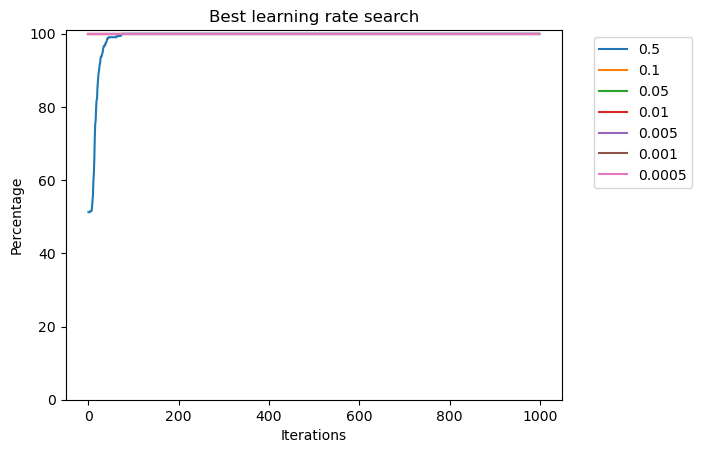

Best learning rate:
 0.5


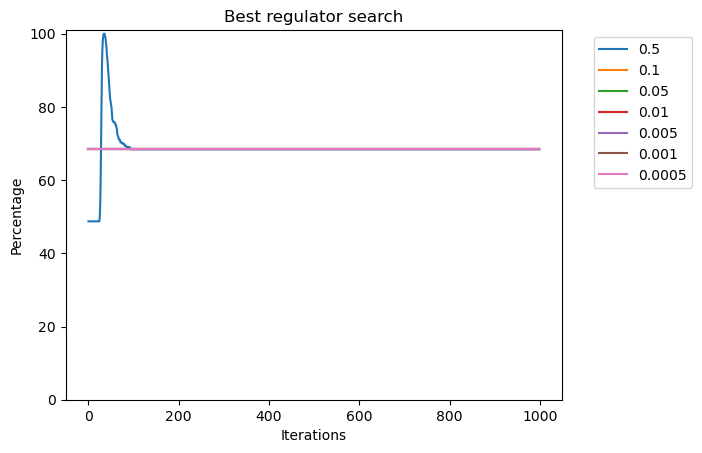

Best regulator:
 0.5


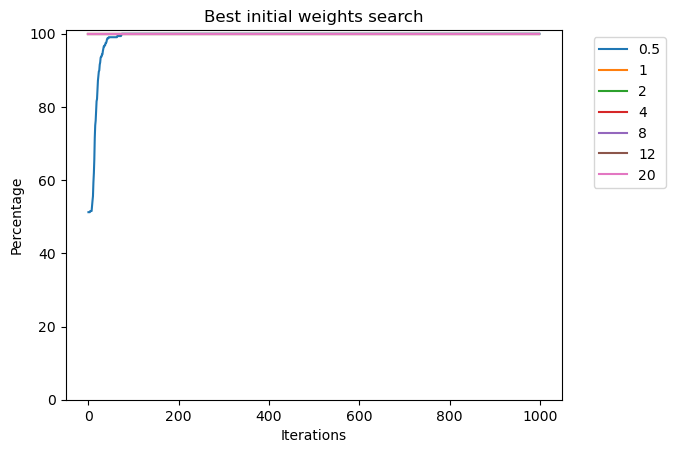

Best initial weights:
 [[-2.38179415]
 [ 2.31807734]
 [ 2.71163459]]


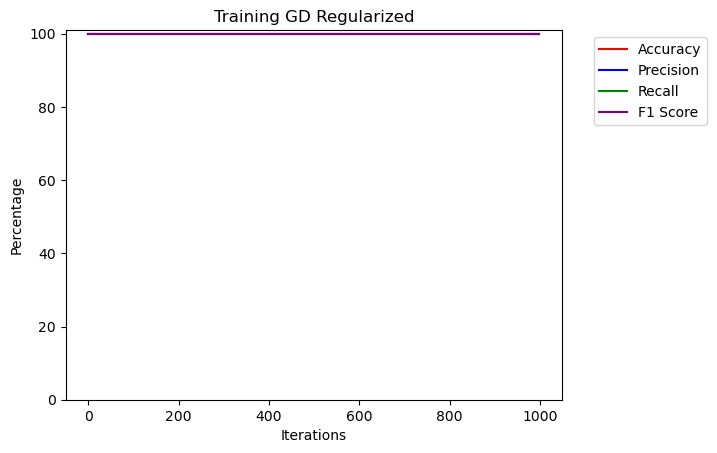

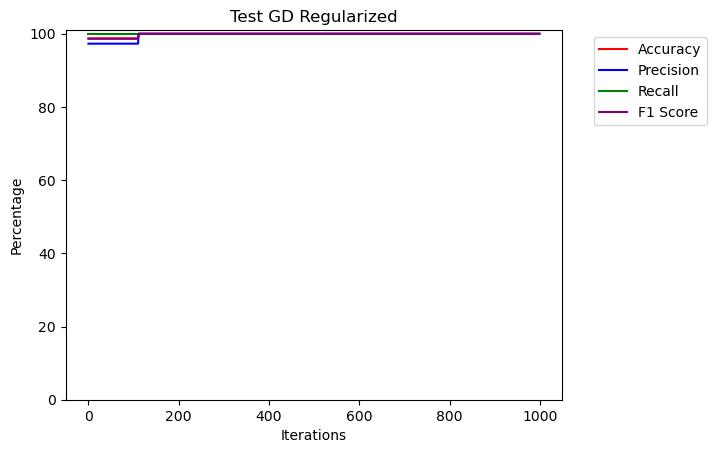

The table of the final training metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 100.0                | 100.0                |
| Precision  | 100.0                | 100.0                |
| Recall     | 100.0                | 100.0                |
| F1-Score   | 100.0                | 100.0                |
The table of the final test metrics:
| Metric     | Train                | Test                 |
+------------+----------------------+----------------------+
| Accuracy   | 100.0                | 100.0                |
| Precision  | 100.0                | 100.0                |
| Recall     | 100.0                | 100.0                |
| F1-Score   | 100.0                | 100.0                |


In [21]:
##############################################################################
# TODO: -Complete fit_gd_regularized() method as instructed.                 #
# -Construct a Perceptron model for binary classification where targets      #
# are -1 or +1.                                                              #
# -Train your model with fit_gd_regularized() method which implements GD     #
# algorithm on regularized cost function. The purpose is preventing feature  #
# toucing weights to grow larger. Implement hyperparameter                   #
# search for learning rate, weight initialization, and regularization        #
# parameter lambda. Plot training and test accuracies.                       #
# -Report performance in terms of accuracy, recall, precision, and F-1 scores#
##############################################################################
from data_utils import MinMaxScaler
from SoftmaxPerceptron import SoftmaxPerceptron

scaler = MinMaxScaler(min_limit=0, max_limit=1)
scaler.fit(X_train)
x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

best_lambda = 0.01
best_w = np.random.randn(X_train.shape[0] + 1, 1) * 0.02
best_lr = 0.05
max_iter = 1000
learning_rates = [5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4]
lambdas = [5e-1, 1e-1, 5e-2, 1e-2, 5e-3, 1e-3, 5e-4]
coeffs = [0.5, 1, 2, 4, 8, 12, 20]
# initial weights to be used
weights = np.zeros((7,X_train.shape[0] + 1, 1))
for i, coeff in enumerate(coeffs):
    weights[i,:,:] = coeff * np.zeros((X_train.shape[0] + 1, 1))

best_lr = plotParamSearch("learning rate", learning_rates, SoftmaxPerceptron,
                {
                    "weights": best_w, 
                    "learning_rate": None, 
                    "max_iter": max_iter
                },
                "fit_gd_regularized",
                {
                    "X": x_train_scaled,
                    "y": y_train,
                    "regularization_strength": best_lambda
                })
best_lr = plotParamSearch("regulator", lambdas, SoftmaxPerceptron,
                {
                    "weights": best_w, 
                    "learning_rate": best_lr, 
                    "max_iter": max_iter
                },
                "fit_gd_regularized",
                {
                    "X": x_train_scaled,
                    "y": y_train,
                    "regularization_strength": None
                })
best_w = plotParamSearch("initial weights", weights, SoftmaxPerceptron,
                {
                    "weights": None, 
                    "learning_rate": best_lr, 
                    "max_iter": max_iter
                },
                "fit_gd_regularized",
                {
                    "X": x_train_scaled,
                    "y": y_train,
                    "regularization_strength": best_lambda
                },
                coeffs)

model = SoftmaxPerceptron(best_w, best_lr, max_iter)
train_metrics = model.fit_gd_regularized(x_train_scaled, y_train, best_lambda)
plotMetrics(train_metrics, 'Iterations', 'Percentage', 'Training GD Regularized')

model = SoftmaxPerceptron(best_w, best_lr, max_iter)
test_metrics = model.fit_gd_regularized(x_test_scaled, y_test, best_lambda)
plotMetrics(test_metrics, 'Iterations', 'Percentage', 'Test GD Regularized')

reportMetrics(train_metrics)
reportMetrics(test_metrics, False)

##############################################################################
#                             END OF YOUR CODE                               #
##############################################################################